In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def g_filter(data, x0, y0, dx, dy, g, dt):

    x_est = x0
    y_est = y0

    results = []
    for measurement in data:

        #Prediction
        x_pred = x_est + dx * dt
        y_pred = y_est + dy * dt
        
        #Residual calculation
        residual_x = measurement[0] - x_pred
        residual_y = measurement[1] - y_pred

        #Update estimates
        x_est = x_pred + g * residual_x
        y_est = y_pred + g * residual_y

        results.append((x_est, y_est))
    
    return np.array(results)



In [3]:
# Simulation parameters

dt = 0.1
total_time = 21
x0, y0 = 0, 0
dx, dy = 1, 0.5
g = 0.5



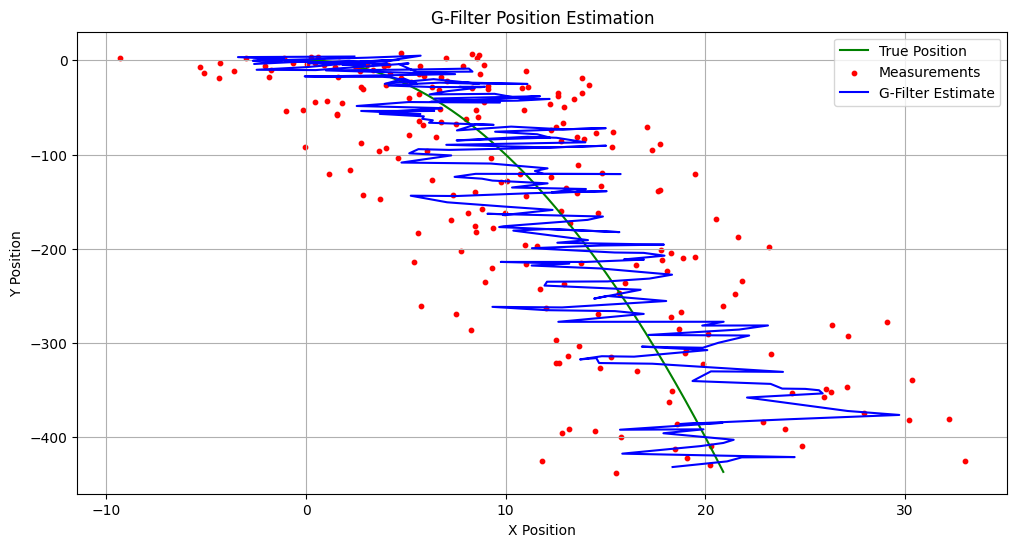

In [8]:
t = np.arange(0, total_time, dt)
x_true = x0 + dx * t
y_true = -x_true ** 2
true_positions = np.column_stack((x_true, y_true))
noise = np.random.normal(0, 5, true_positions.shape)
measurements = true_positions + noise
filtered_positions = g_filter(measurements, x0, y0, dx, dy, g, dt)

# Plotting results
plt.figure(figsize=(12, 6))
plt.plot(true_positions[:, 0], true_positions[:, 1], label='True Position', color='g')
plt.scatter(measurements[:, 0], measurements[:, 1], label='Measurements', color='r', s=10)
plt.plot(filtered_positions[:, 0], filtered_positions[:, 1], label='G-Filter Estimate', color='b')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('G-Filter Position Estimation')
plt.legend()
plt.grid()
plt.show()
